In [3]:
#Import LIbraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Regular expressions
import re

# seaborn : advanced visualization
import seaborn as sns

pd.options.mode.chained_assignment = None #set it to None to remove SettingWithCopyWarning
pd.options.display.float_format = '{:.4f}'.format #set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.set_option('display.max_columns', 100) # to display all the columns

np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})

import os

import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored

In [4]:
print(os.listdir("files"))

['loan.csv', 'Data_Dictionary.xlsx']


## Reading file into dataframe

In [5]:
loan = pd.read_csv('files/loan.csv',dtype='object',encoding = "ISO-8859-1")
print(loan.shape)

(39717, 111)


In [6]:
loan.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,NaN,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,NaN,Apr-16,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0,0,0,May-16,67.79,Jun-16,May-16

## Remove not required columns

In [7]:
# Removing null columns where null values more than 50%

loan=loan.loc[ :, loan.isin([np.nan,'NULL']).mean()<0.5]
loan.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,May-16,0,1,INDIVIDUAL,0,0,0,0,0
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0,1,INDIVIDUAL,0,0,0,0,0


In [8]:
loan.shape

(39717, 54)

In [9]:
# Droping column 'desc'
loan = loan.drop('desc',axis=1)
loan.shape

(39717, 53)

In [10]:
# Drop columns where all the values are 0
loan=loan.loc[ :, loan.isin(['0',np.nan]).mean()<1]
loan.shape

(39717, 48)

In [11]:
# Drop few not required column
not_required_columns = ["member_id","url","zip_code"]
loan.drop(labels = not_required_columns, axis =1, inplace=True)
loan.shape

(39717, 45)

In [12]:
loan.dropna(axis=0, subset=['pub_rec_bankruptcies'], thresh=2)
loan.shape

(39717, 45)

In [13]:
loan.head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies
0,1077501,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,May-16,1,INDIVIDUAL,0
1,1077430,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,car,bike,GA,1,0,Apr-99,5,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0


In [14]:
loan.nunique().sort_values()

application_type               1
policy_code                    1
pymnt_plan                     1
initial_list_status            1
term                           2
loan_status                    3
verification_status            3
pub_rec_bankruptcies           3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
last_pymnt_d                 101
last_credit_pull_d           106
int_rate                     371
earliest_cr_line             526
loan_amnt                    885
funded_amnt                 1041
revol_util                  1089
out_prncp                   1137
out_prncp_inv               1138
total_rec_late_fee          1356
collection

In [15]:
# removing all unique value and all different value columns
not_required_columns = ["id","application_type","policy_code", "initial_list_status","pymnt_plan"]
loan.drop(labels = not_required_columns, axis =1, inplace=True)
loan.shape

(39717, 40)

In [16]:
percent_missing = loan.isnull().sum() * 100 / len(loan)
percent_missing[percent_missing != 0]

emp_title              6.1913
emp_length             2.7066
title                  0.0277
revol_util             0.1259
last_pymnt_d           0.1788
last_credit_pull_d     0.0050
pub_rec_bankruptcies   1.7549
dtype: float64

In [17]:
# droping null rows for emp_title and emp_length
loan = loan.dropna(axis=0, subset=['emp_title'])
loan = loan.dropna(axis=0, subset=['emp_length'])
loan = loan.dropna(axis=0, subset=['pub_rec_bankruptcies'])
loan.shape

(36548, 40)

In [18]:
# Drop duplicate rows
loan=loan.drop_duplicates()
loan.shape

(36548, 40)

## Data Cleansing

In [19]:
loan['term'] = loan['term'].str.replace('months', '')
loan.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,2500,2500,60,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,car,bike,GA,1,0,Apr-99,5,3,0,1687,9.40%,4,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0
3,10000,10000,10000,36,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,other,personel,CA,20,0,Feb-96,1,10,0,5598,21%,37,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,Apr-16,0


In [20]:
loan["int_rate"] = loan["int_rate"].str.replace('%','')
loan["revol_util"]= loan["revol_util"].str.replace('%','')
loan.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,2500,2500,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,car,bike,GA,1,0,Apr-99,5,3,0,1687,9.40,4,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0
3,10000,10000,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,other,personel,CA,20,0,Feb-96,1,10,0,5598,21,37,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,Apr-16,0


In [21]:
#emp_length cleansing
print(loan.emp_length.unique())
loan.emp_length.fillna('0',inplace=True)
loan.emp_length.replace(['n/a'],'Self-Employed',inplace=True)
print(loan.emp_length.unique())
emp_length =  {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}
loan=loan.replace({"emp_length":emp_length})
loan.head(2)

['< 1 year' '10+ years' '1 year' '3 years' '8 years' '9 years' '5 years'
 '4 years' '6 years' '2 years' '7 years']
['< 1 year' '10+ years' '1 year' '3 years' '8 years' '9 years' '5 years'
 '4 years' '6 years' '2 years' '7 years']


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,2500,2500,60,15.27,59.83,C,C4,Ryder,0,RENT,30000,Source Verified,Dec-11,Charged Off,car,bike,GA,1,0,Apr-99,5,3,0,1687,9.40,4,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0
3,10000,10000,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200,Source Verified,Dec-11,Fully Paid,other,personel,CA,20,0,Feb-96,1,10,0,5598,21,37,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,Apr-16,0


In [22]:
num_col = ['annual_inc','funded_amnt','funded_amnt_inv','installment','loan_amnt','int_rate','dti']

loan[num_col] = loan[num_col].apply(pd.to_numeric).round(2)
loan.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,2500,2500.0000,60,15.2700,59.8300,C,C4,Ryder,0,RENT,30000.0000,Source Verified,Dec-11,Charged Off,car,bike,GA,1.0000,0,Apr-99,5,3,0,1687,9.40,4,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0
3,10000,10000,10000.0000,36,13.4900,339.3100,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0000,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.0000,0,Feb-96,1,10,0,5598,21,37,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,Apr-16,0


In [23]:
# Median imputation for NA values
loan=loan.fillna(loan.median())
percent_missing = loan.isnull().sum() * 100 / len(loan)
percent_missing[percent_missing != 0]

title          0.0246
last_pymnt_d   0.1751
dtype: float64

In [24]:
# Nonumeric column dropping those rows.
loan = loan.dropna(axis=0, subset=['title'])
loan = loan.dropna(axis=0, subset=['last_pymnt_d'])
loan.shape

(36475, 40)

## Derived Columns ## 

In [25]:
loan['issue_m'],loan['issue_y'] = loan['issue_d'].str.split('-', 1).str
loan[['issue_d','issue_m','issue_y']].head(5)

,issue_d,issue_m,issue_y
1,Dec-11,Dec,11
3,Dec-11,Dec,11
4,Dec-11,Dec,11
5,Dec-11,Dec,11
6,Dec-11,Dec,11


In [26]:
loan['loan_income_ratio']= loan['loan_amnt']/loan['annual_inc']

In [27]:
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loan['loan_amnt_range'] = pd.cut(loan['loan_amnt'], bins, labels=slot)

In [28]:
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loan['annual_inc_range'] = pd.cut(loan['annual_inc'], bins, labels=slot)

In [29]:
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
loan['int_rate_range'] = pd.cut(loan['int_rate'], bins, labels=slot)

In [69]:
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
loan['dti_range'] = pd.cut(loan['dti'], bins, labels=slot)

In [30]:
loan.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_m,issue_y,loan_income_ratio,loan_amnt_range,annual_inc_range,int_rate_range
1,2500,2500,2500.0000,60,15.2700,59.8300,C,C4,Ryder,0,RENT,30000.0000,Source Verified,Dec-11,Charged Off,car,bike,GA,1.0000,0,Apr-99,5,3,0,1687,9.40,4,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0,Dec,11,0.0833,0-5000,25000-50000,15 and above
3,10000,10000,10000.0000,36,13.4900,339.3100,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0000,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.0000,0,Feb-96,1,10,0,5598,21,37,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,Apr-16,0,Dec,11,0.2033,5000-10000,25000-50000,12.5-15


## Univariate Analysis

In [31]:
# Defining a function to plot charts.
# For continious variable we need box plot, violin plot and distribution plot- type 0
# For categorical variable we need bar chart- type 1 , as Loan status is key column we will pass loan status as hue
# Also for categircal variable we will overlay a line chart for loan status- charged-off vs loan status fully paid
# This will give us more insight for that particular variable during univariate analysis.

def univariatePlot(df,col,type,hue =None):
    sns.set(style="dark")
    
    if type == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if type == 1:
        temp = pd.Series(data = hue)
        
        temp_ratio=pd.Series([], dtype=float)
        temp_ratio_2=pd.Series([], dtype=float)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        print(width)
        fig.set_size_inches(width , 7)
        hue_ord=None if hue==None else df[hue].value_counts().index
        sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,hue_order=hue_ord) 
        if len(temp.unique()) > 0:
            for i, p in enumerate(ax.patches):
                if(i < df[col].nunique()):
                   temp_ratio=temp_ratio.append(pd.Series([float('{:1.1f}'.format((p.get_height()*100)/float(len(loan))))]))
                elif(i < 2* df[col].nunique()):
                   temp_ratio_2=temp_ratio_2.append(pd.Series([float('{:1.1f}'.format((p.get_height()*100)/float(len(loan))))]))
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))  
            ax2 = ax.twinx()
            temp_ratio=temp_ratio_2.div(temp_ratio)
            temp_ratio= temp_ratio*100
            sns.lineplot(y= temp_ratio, x=df[col].value_counts().index, color='teal',  sort=False,ax=ax2)
           # ax2.text(width/7, 20, "Line chart= Charged off: Fully Paid",verticalalignment= 'top', horizontalalignment='left', size='medium', color='teal', weight='semibold')
            ax2.annotate("Line chart= Charged off: Fully Paid", xy=(0,1), xycoords="axes fraction",
                    xytext=(100,-5), textcoords="offset points",
                    ha="left", va="top", color="teal")
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
        del temp_ratio
        del temp_ratio_2
    else:
        exit
        
    plt.show()

### Loan Amount ###

#### loan_amnt is continious variable where as derived variable loan_amnt_range is categorical variable.

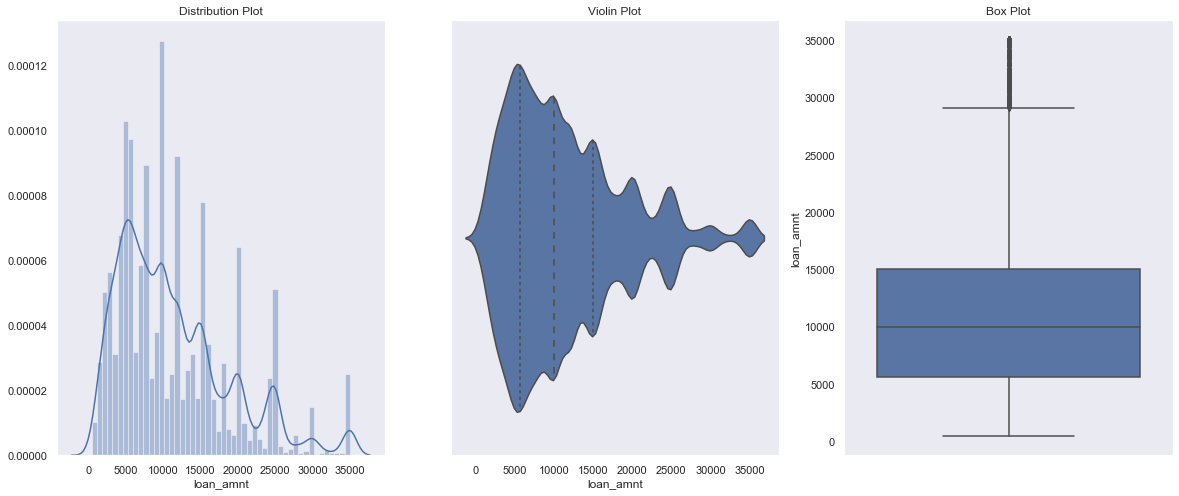

In [32]:
univariatePlot(df=loan,col='loan_amnt',type=0)

In [33]:
loan.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4954.0000,12271.7854,8064.6851,1000.0000,6000.0000,10000.0000,16987.5000,35000.0000
Current,1066.0000,17100.7036,8571.0932,1000.0000,12000.0000,16000.0000,22800.0000,35000.0000
Fully Paid,30455.0000,10939.1725,7181.9410,500.0000,5500.0000,9600.0000,15000.0000,35000.0000


In [34]:
loan['loan_amnt'].describe()

count   36475.0000
mean    11300.2406
std      7434.0069
min       500.0000
25%      5600.0000
50%     10000.0000
75%     15000.0000
max     35000.0000
Name: loan_amnt, dtype: float64

16


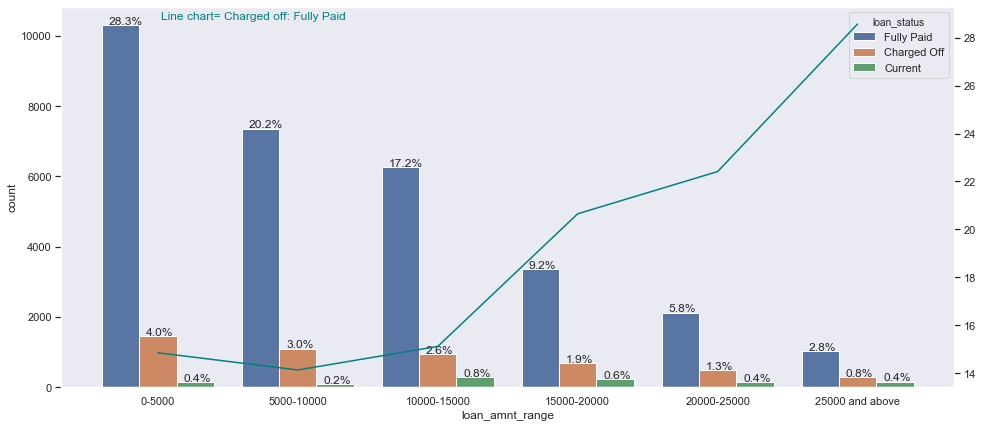

In [35]:
univariatePlot(df=loan,col='loan_amnt_range',type=1, hue= "loan_status")

##### 1. Loan amounts are mostly between 5500-15000 
##### 2. With higher range of loan amount likely to be Charged Off more.
##### 3. Violin plot/Distribution plot suggests people likely to take loan on rounded figures like 20000/25000`

### Interest rate 

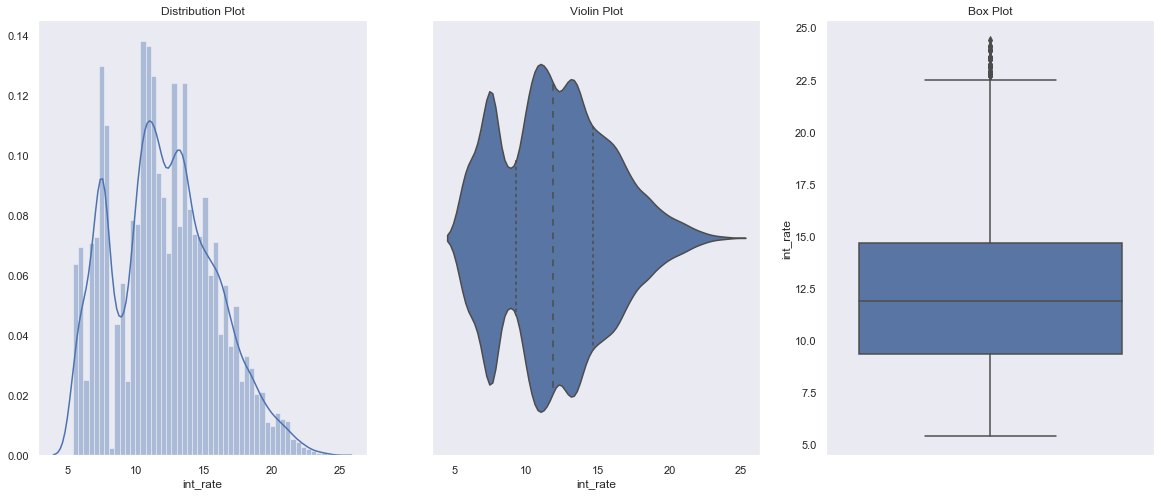

In [36]:
univariatePlot(df=loan,col='int_rate',type=0)

16


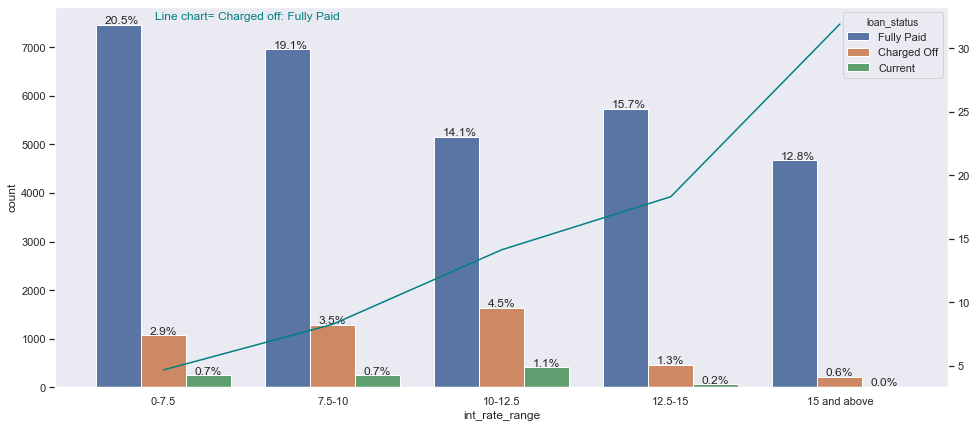

In [37]:
univariatePlot(df=loan,col='int_rate_range',type=1,hue="loan_status")

##### 1. Interest Rate between 9-14.5 % ####
##### 2. 24% applicant are in in 10-12.5% range ###

### Annual Income

#### annual_inc is continuous variable. Where as derived variable annual_inc_range is segmented.

In [38]:
loan["annual_inc"].describe()

count     36475.0000
mean      69280.7684
std       63551.4045
min        4000.0000
25%       42000.0000
50%       60000.0000
75%       83000.0000
max     6000000.0000
Name: annual_inc, dtype: float64

###### Removing Outliers ######

In [39]:
q = loan["annual_inc"].quantile(0.995)
loan = loan[loan["annual_inc"] < q]
loan["annual_inc"].describe()

count    36280.0000
mean     66793.0614
std      36803.6188
min       4000.0000
25%      41600.0000
50%      60000.0000
75%      82000.0000
max     294000.0000
Name: annual_inc, dtype: float64

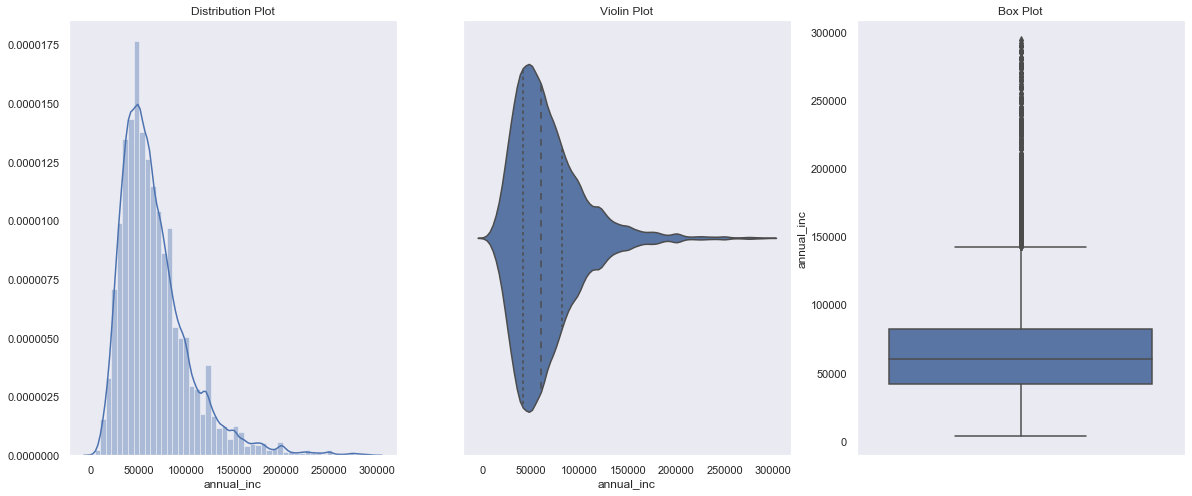

In [40]:
univariatePlot(df=loan,col='annual_inc',type=0)

15


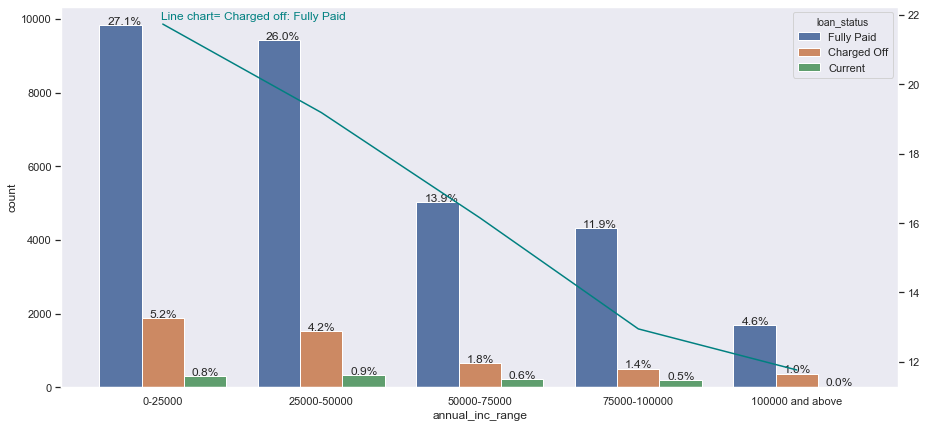

In [41]:
univariatePlot(df=loan,col='annual_inc_range',type=1,hue='loan_status')

#### Loan to income ratio

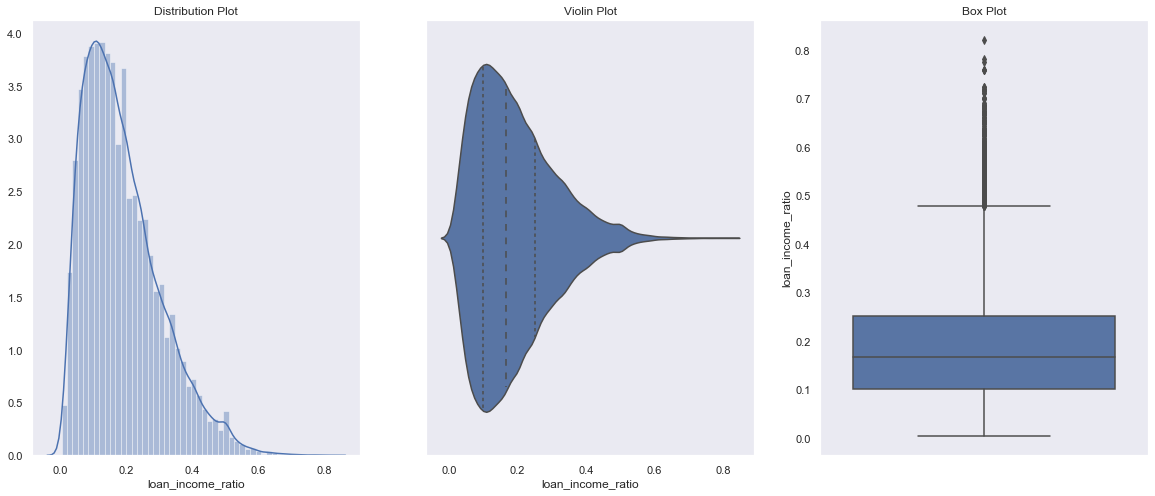

In [42]:
univariatePlot(df=loan,col='loan_income_ratio',type=0)

##### Loan takers income Observation. These income group of people most likely to take loan
##### 1. Income lies between 40000 - 80000 approx 
##### 2. loan to income ratio between 0.1 to 0.25 
##### Charged Off Observation- Lower the income more likely to be defaulter. Not safe to distribute loan below 50000 salary

## Categorical variables- loan_status, purpose, home_ownership, issue_year+loan_status, term vs status ##

##### <font color=blue> Loan status is main column for analysis. Going forward we will analyze every variable in context to loan status </font>  

9


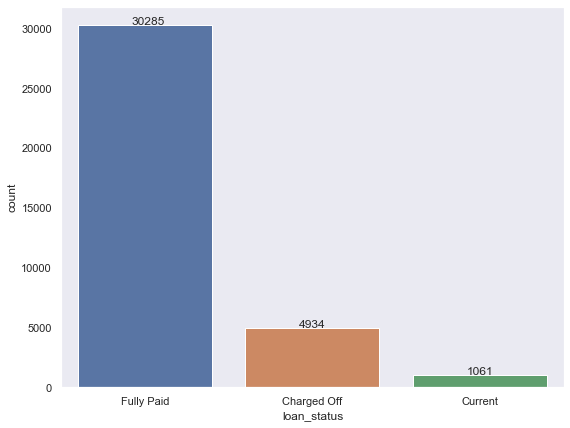

In [43]:
univariatePlot(df=loan,col='loan_status',type=1)

In [44]:
# Percentage loan charged off
y=loan.groupby('loan_status')['loan_amnt'].count()['Charged Off']
print(y/loan['loan_amnt'].count())

0.13599779492833516


In [45]:
#charged off : Fully paid ration
print(y/loan.groupby('loan_status')['loan_amnt'].count()['Fully Paid'])

0.1629189367673766


#### Average stat is mentioned above. We will consider 20% value more than value above for allowed limit.
#### That is more than 18.5% charge off to fully paid ratio for any category prove to be vulnerable for distributing further loan


### Purpose

24


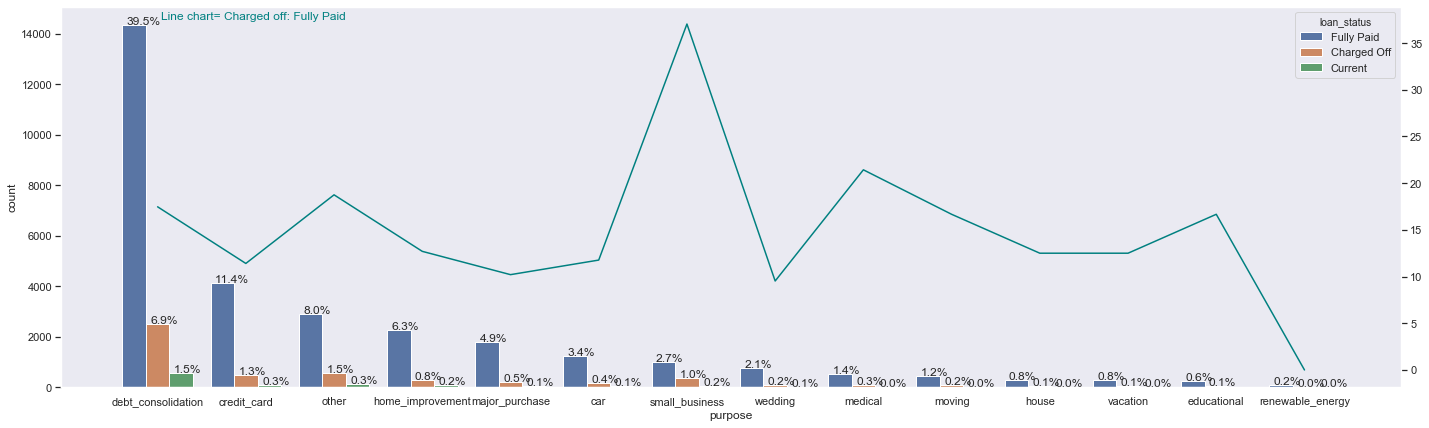

In [46]:
univariatePlot(df=loan,col='purpose',type=1,hue='loan_status')

#### (38.5 +7+1.5) = 47% for debt consolidation. 2% have current ongoing loan 
#### For small busineess distributing loan is risky

### Home Ownership

In [47]:
loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [48]:
value = ['OTHER', 'NONE']
loan.drop(loan[loan['home_ownership'].isin(value)].index,inplace=True)
loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

13


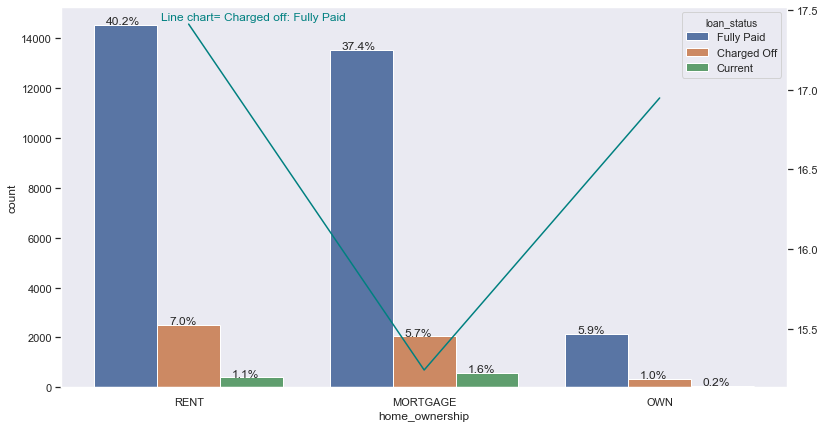

In [49]:
univariatePlot(df=loan,col='home_ownership',type=1,hue='loan_status')

##### 48% lives in rented room , 44% people already mortgaged  
##### People Mortaged home likely to repay loan more than compared to others

### Loan Issue Year

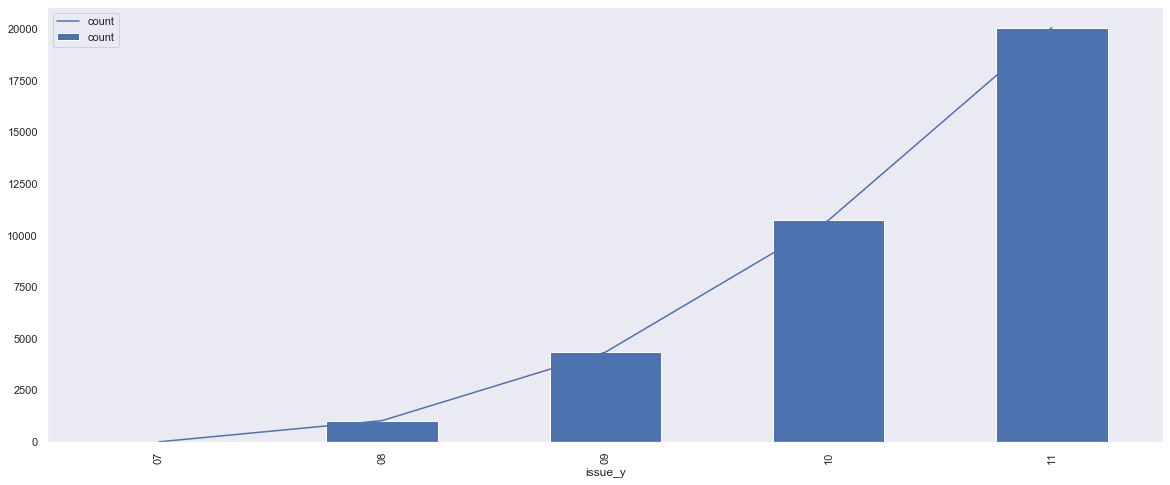

In [50]:
year_wise =loan.groupby(by= [loan.issue_y])[['loan_status']].count()
year_wise.rename(columns={"loan_status": "count"},inplace=True)
ax =year_wise.plot(figsize=(20,8))
year_wise.plot(kind='bar',figsize=(20,8),ax = ax)
plt.show()

##### Over 20000 loan on 2011. loan dispatch count doubled every year. 

### Term

12


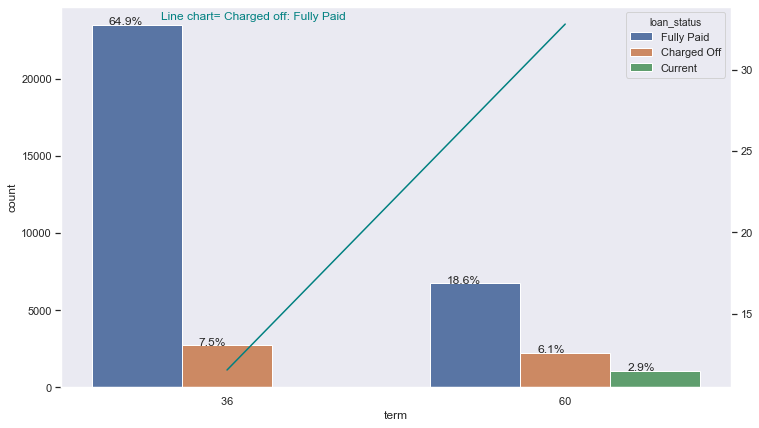

In [51]:
univariatePlot(df=loan,col='term',type=1,hue='loan_status')

##### 73% applicants opted for 36 month term. 
##### only 2.9% people still under current. 
##### 60 months category people more likely to charged off

## GRADE and SUB GRADE ##

17


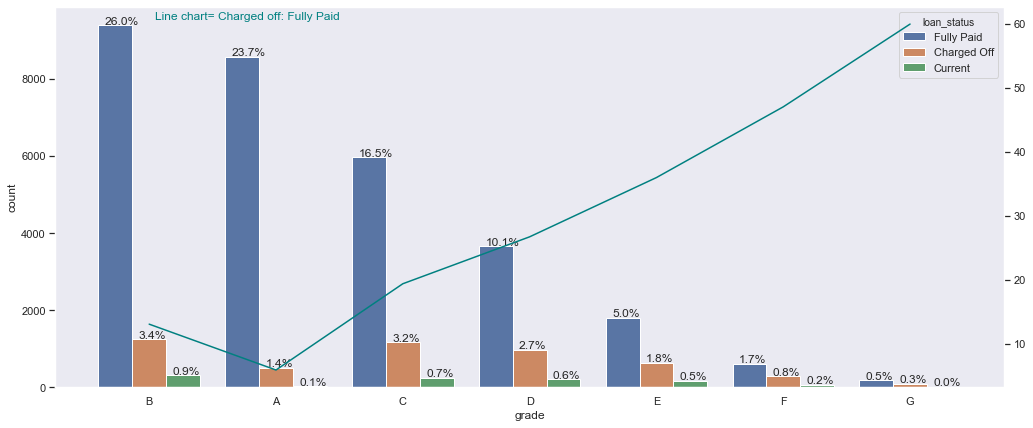

In [52]:
univariatePlot(df=loan,col='grade',type=1,hue='loan_status')

##### FOR A and B Grade Fully Paid is far more than CHarged Off. For this graded loans likely to get repaid
##### For D, E 20-25 % probability of not returning loan 
##### For F and G 30- 40% probability of not returning loan.
##### B and A grade loans are dibusrsed more frequently

## EMP LENGTH 

21


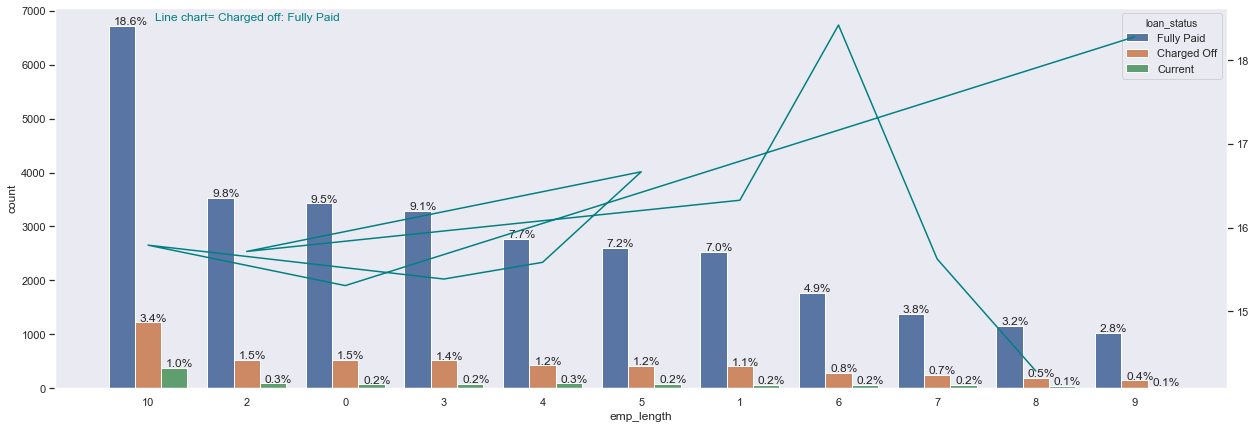

In [53]:
univariatePlot(df=loan,col='emp_length',type=1,hue='loan_status')

##### More than 10 years exp applicants are 18% double of any other categories
##### Charged off across years of experience are almost consistent. Trends ca nont be drawn

## Verification status

13


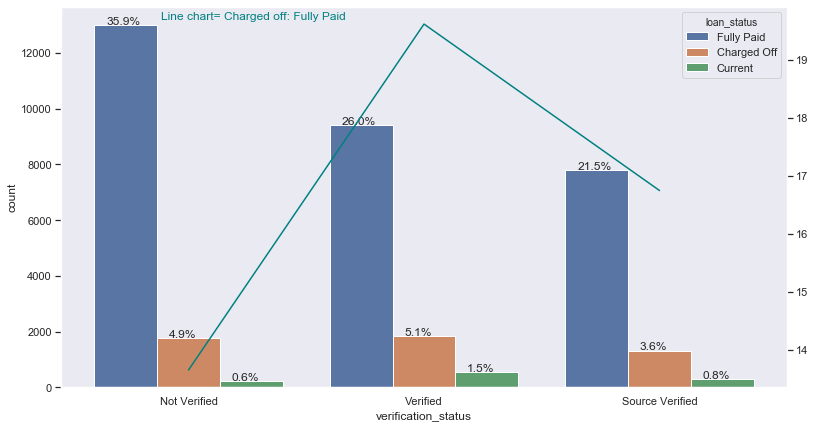

In [54]:
univariatePlot(df=loan,col='verification_status',type=1,hue='loan_status')

##### percentage of Verified people likely to be charged off. Verification has an negetive impact

## DTI

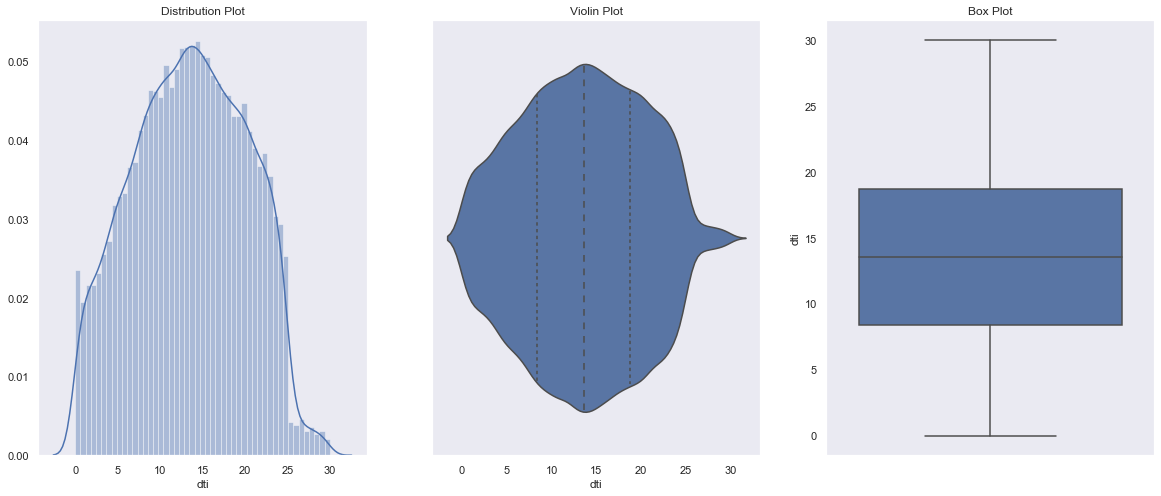

In [55]:
univariatePlot(df=loan,col='dti',type=0)

16


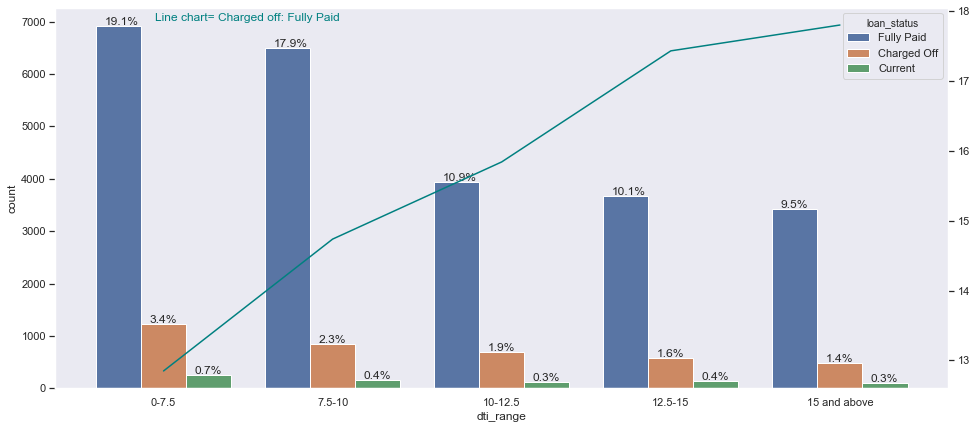

In [70]:
univariatePlot(df=loan,col='dti_range',type=1,hue='loan_status')

##### dti likely to be between 8 to 19

19


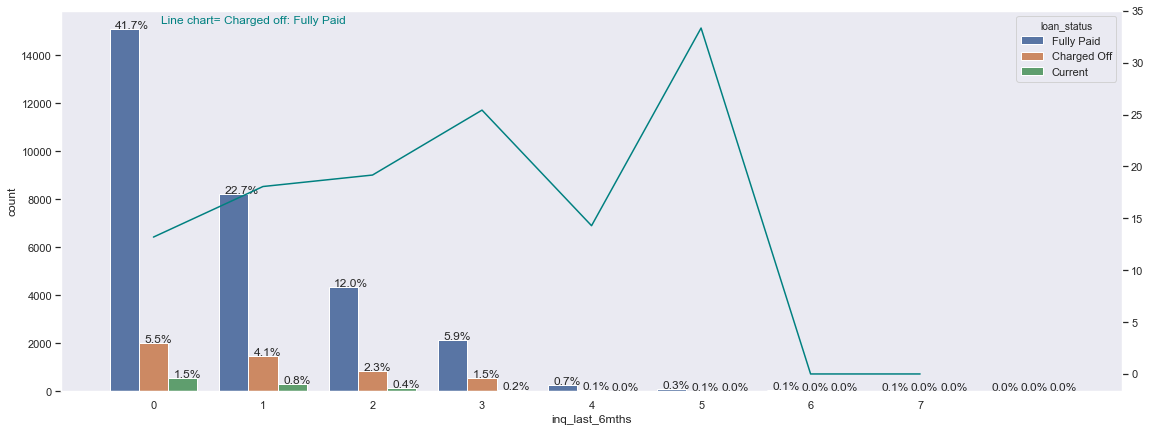

In [57]:

univariatePlot(df=loan,col='inq_last_6mths',type=1,hue='loan_status')

##### More numbers of inquiry leads to more chrged off.

### Open Account

48


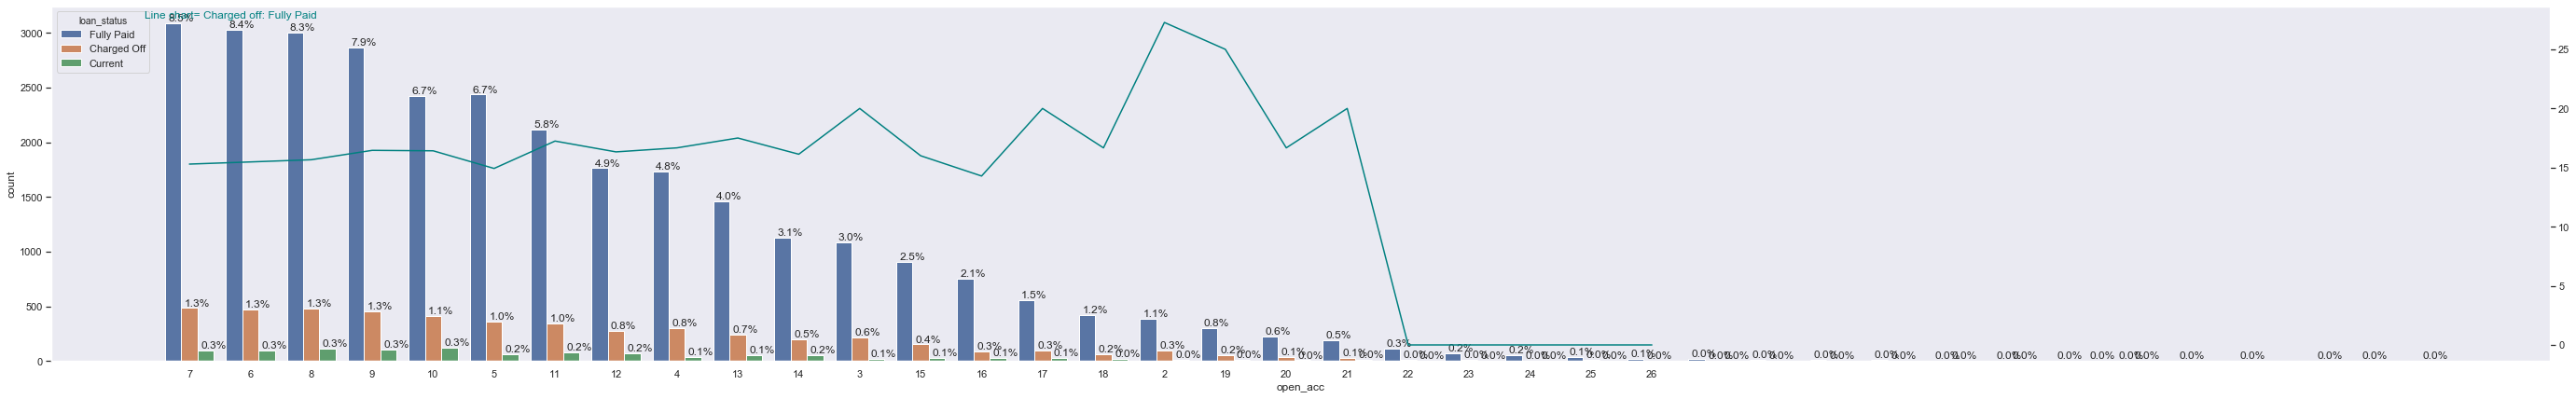

In [58]:
loan['open_acc'] = loan['open_acc'].replace('?',np.nan)
loan['open_acc'] = loan['open_acc'].fillna(loan['open_acc'].median())
univariatePlot(df=loan,col='open_acc',type=1, hue="loan_status")

15


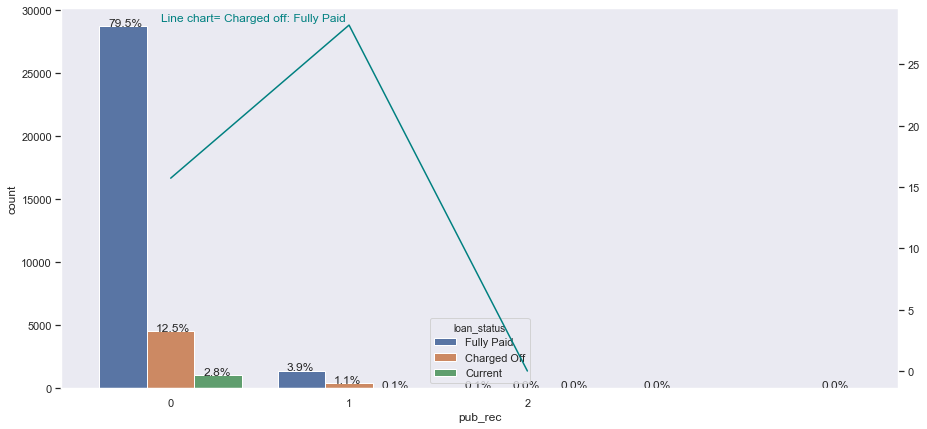

In [59]:
univariatePlot(df=loan,col='pub_rec',type=1, hue="loan_status")

##### more derogatory public record leads to charge of
##### 95% applicant don't have pub_rec i.e no bankrupcy

## REVOL_BAL

In [60]:
loan.groupby('loan_status')['revol_bal'].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,4916,4383,0,134
Current,1061,1019,0,19
Fully Paid,30208,18393,0,714


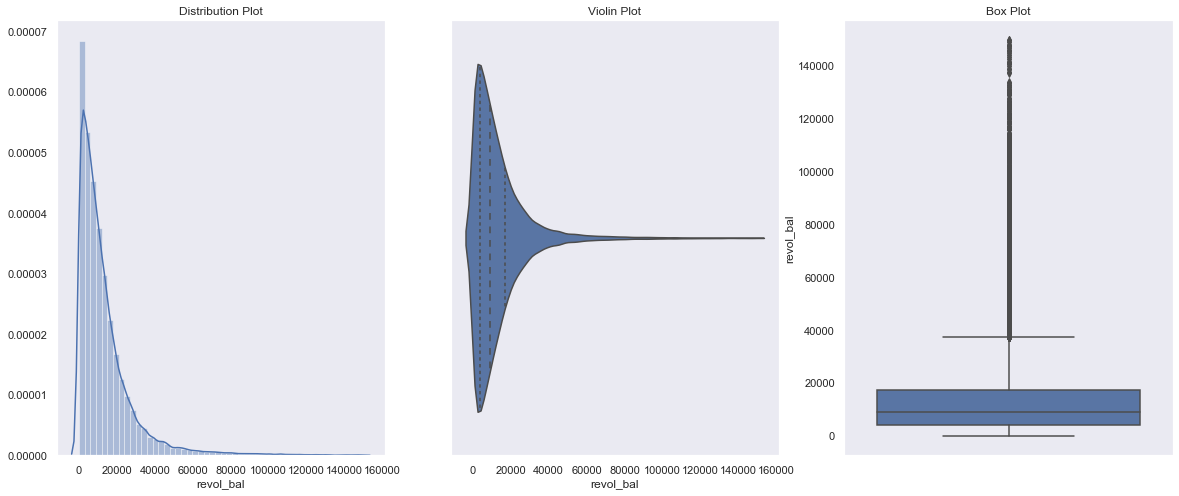

In [61]:
loan["revol_bal"] = pd.to_numeric(loan["revol_bal"])
univariatePlot(df=loan,col='revol_bal',type=0)

##### Revolving balance will be ideally between 3500 to 17000
##### Violin plot has a long tail which suggests that few people has very large amount of revolving balance.

## Total Account

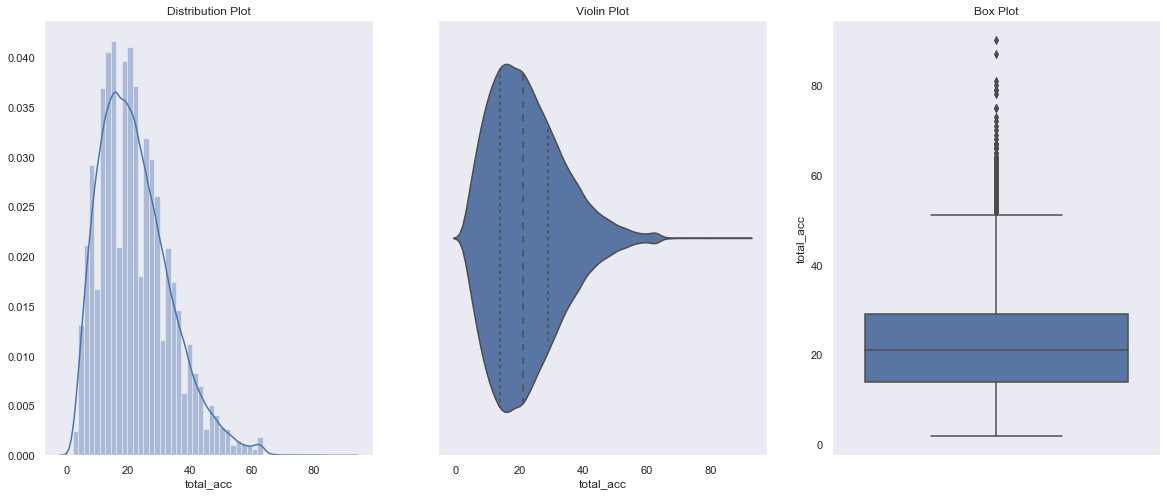

In [62]:
loan["total_acc"] = pd.to_numeric(loan["total_acc"])
univariatePlot(df=loan,col='total_acc',type=0)

## Bivariate/Multivariate Analysis

#### Purpose of Loan vs Loan Amount for each Loan Status

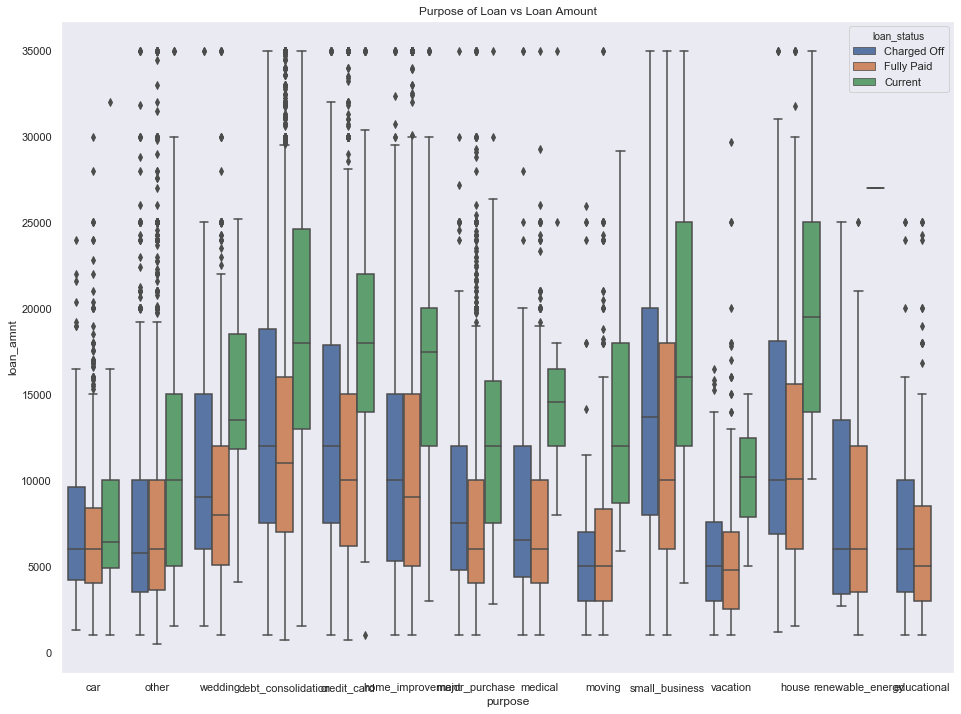

In [63]:
plt.figure(figsize=(16,12))
sns.boxplot(data =loan, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

##### For house, small business and  debt consolidation current will be more
##### no current loan for renewable and education
##### small business, credit card has higher charged off amount

In [64]:
corr = loan.corr()
corr

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,revol_bal,total_acc,loan_income_ratio
loan_amnt,1.0000,0.9815,0.9536,0.3048,0.9288,0.1521,0.4098,0.0728,0.3214,0.2533,0.6306
funded_amnt,0.9815,1.0000,0.9730,0.3095,0.9548,0.1518,0.4054,0.0732,0.3141,0.2472,0.6186
funded_amnt_inv,0.9536,0.9730,1.0000,0.3017,0.9221,0.1578,0.3920,0.0762,0.2980,0.2384,0.6027
int_rate,0.3048,0.3095,0.3017,1.0000,0.2790,0.0063,0.0725,0.1129,0.0964,-0.0472,0.2206
installment,0.9288,0.9548,0.9221,0.2790,1.0000,0.1235,0.4077,0.0623,0.3169,0.2280,0.5691
emp_length,0.1521,0.1518,0.1578,0.0063,0.1235,1.0000,0.1655,0.0521,0.1548,0.2104,0.0080
annual_inc,0.4098,0.4054,0.3920,0.0725,0.4077,0.1655,1.0000,-0.1204,0.4282,0.3734,-0.3080
dti,0.0728,0.0732,0.0762,0.1129,0.0623,0.0521,-0.1204,1.0000,0.2381,0.2326,0.1487
revol_bal,0.3214,0.3141,0.2980,0.0964,0.3169,0.1548,0.4282,0.2381,1.0000,0.3102,0.0062
total_acc,0.2533,0.2472,0.2384,-0.0472,0.2280,0.2104,0.3734,0.2326,0.3102,1.0000,-0.0520


##### Loan_amount, funded_amnt, funded_amnt_inv and installment are strongly correlated
##### int_rate is not correlated with most of the column
##### dit and annual_inc is negetively related

## HEAT MAP

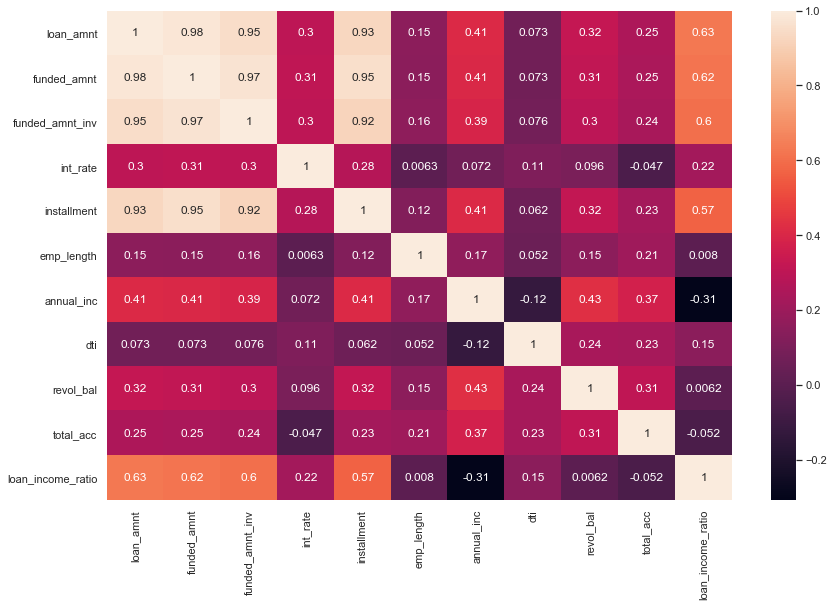

In [65]:
plt.subplots(figsize=(14, 9))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot= True)
plt.show()

## emp_length vs loan_Amt for different pupose of Loan

In [66]:
loan_stat=loan.pivot_table(index=['loan_status','purpose','emp_length'],values='loan_amnt',aggfunc=('count')).reset_index()
loan_stat=loan.loc[loan['loan_status']=='Charged Off']

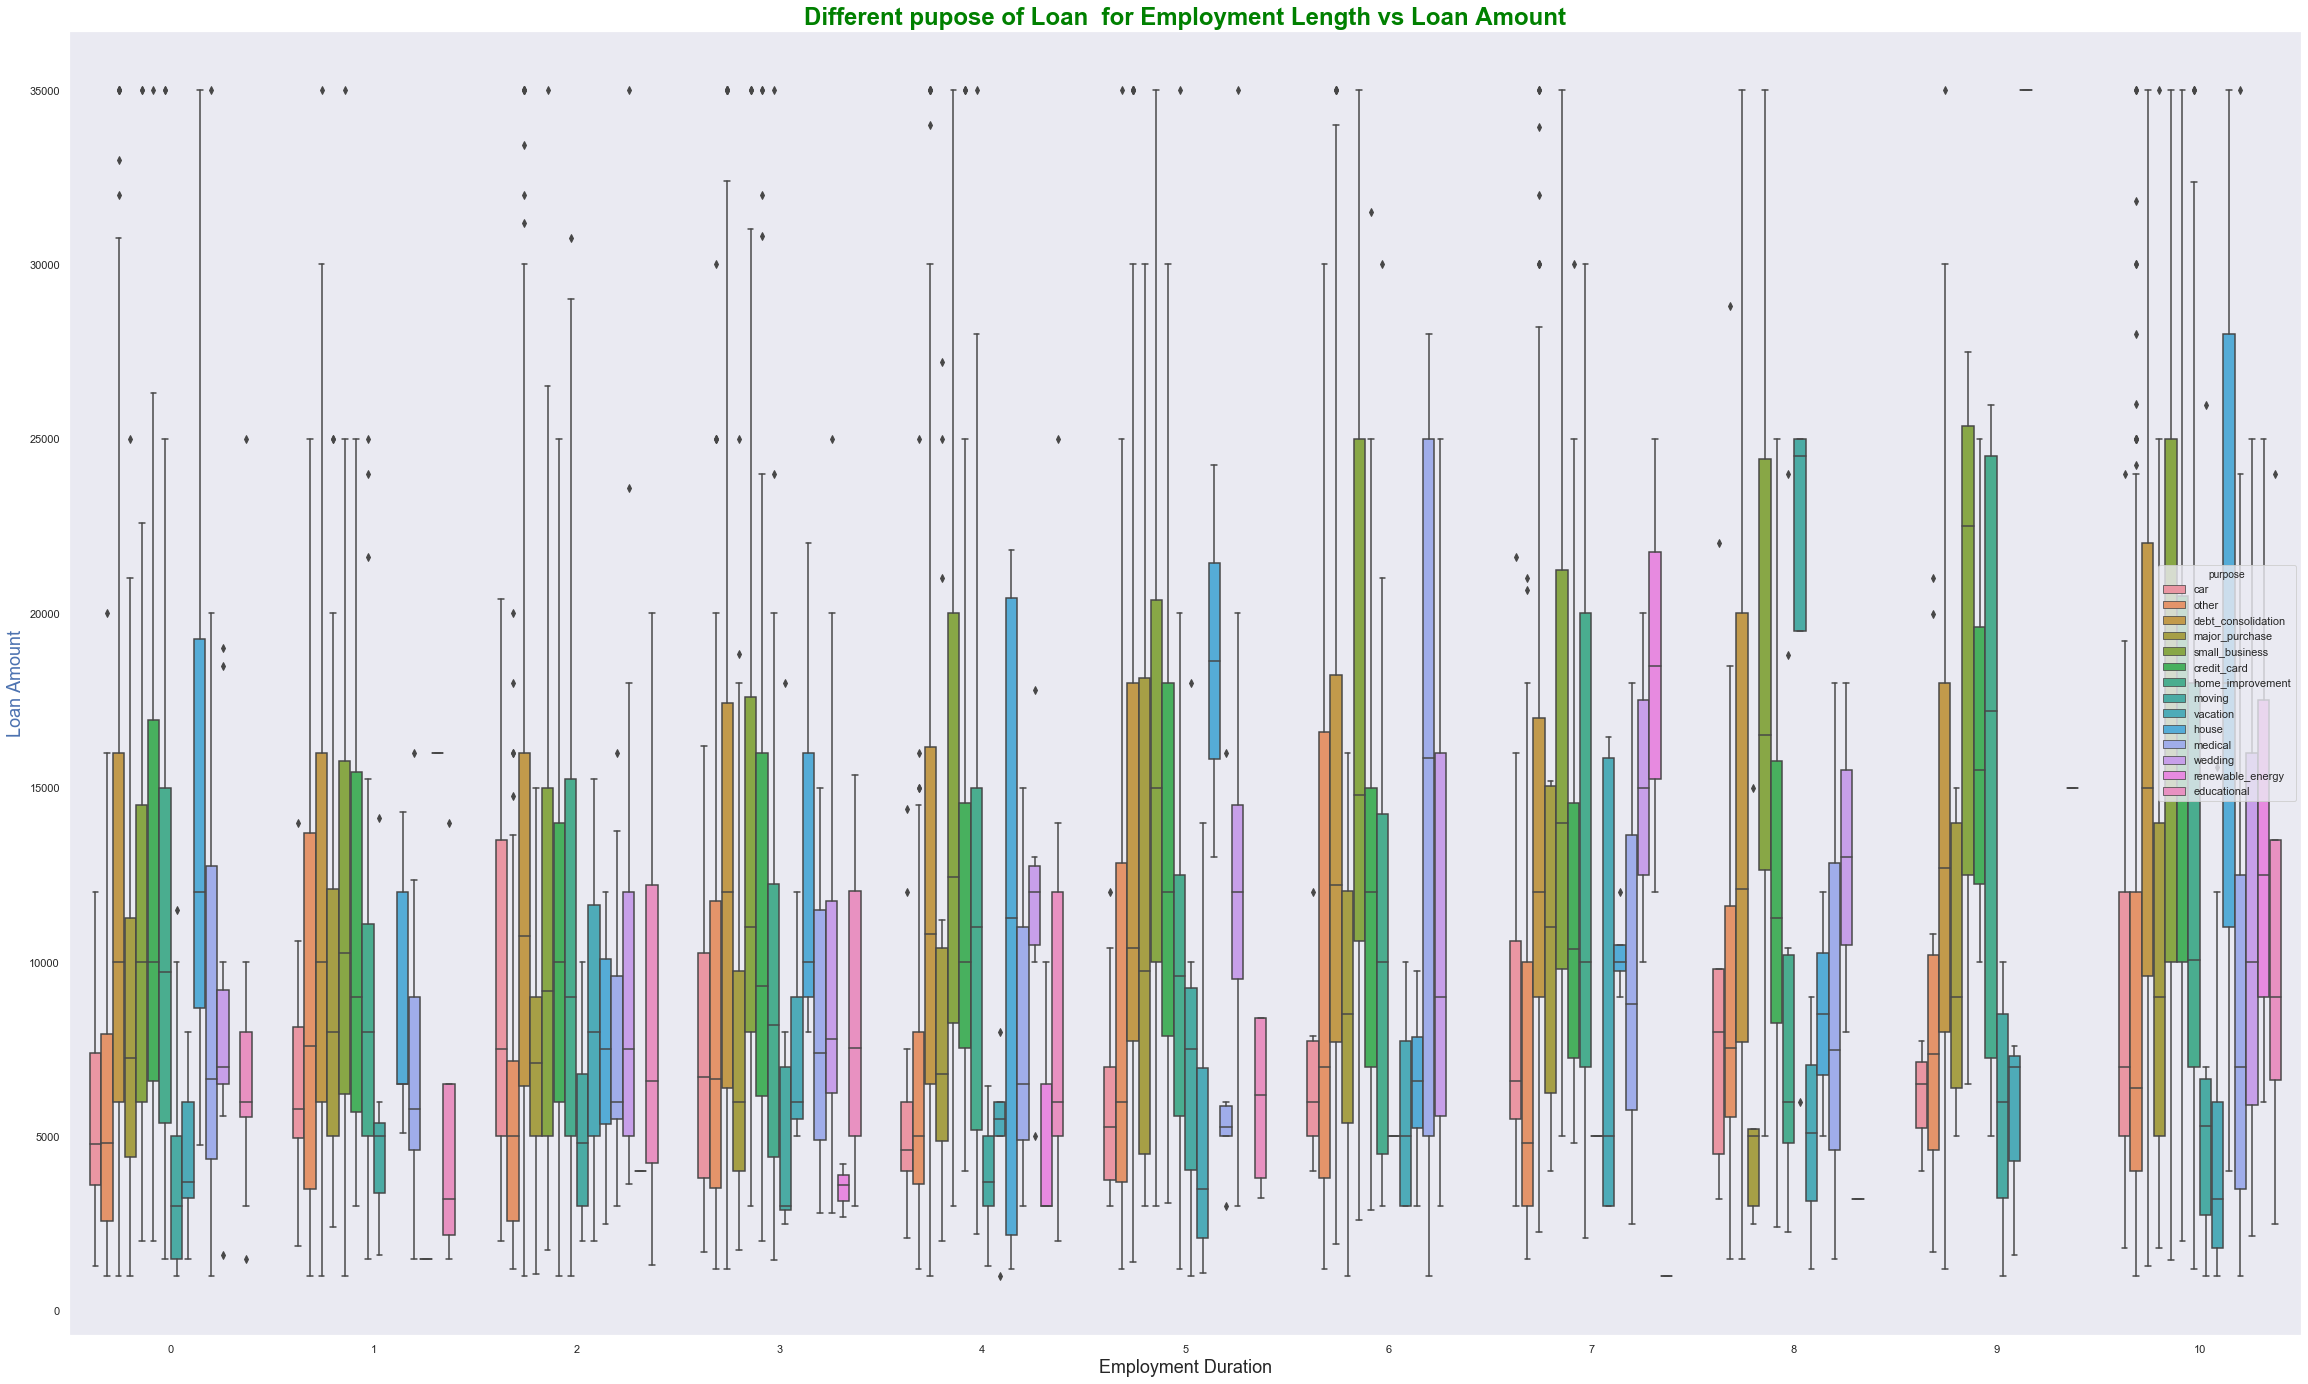

In [67]:
ax = plt.figure(figsize=(40, 24))
ax = sns.boxplot(x='emp_length',y='loan_amnt',hue='purpose',data=loan_stat)
ax.set_title('Different pupose of Loan  for Employment Length vs Loan Amount',fontsize=24,weight="bold",color="green")
ax.set_xlabel('Employment Duration',fontsize=18)
ax.set_ylabel('Loan Amount',color = 'b',fontsize=18)
plt.show()

## 